The `numpy` equivalent to the `Tensorflow` lab.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from lab_utils_common import dlc, sigmoid
from lab_coffee_utils import load_coffee_data, plt_roast, plt_prob, plt_layer, plt_network, plt_output_unit
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

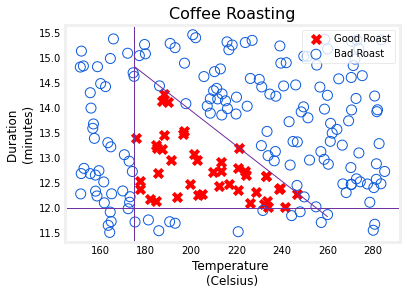

In [3]:
X, Y = load_coffee_data()
plt_roast(X, Y)

Normalizing the data:

In [4]:
norm_l = tf.keras.layers.experimental.preprocessing.Normalization(axis=1)
norm_l.adapt(X)
X_n = norm_l(X)

2022-06-29 21:45:11.460585: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-06-29 21:45:11.460766: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-29 21:45:11.461497: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Get codin':

In [19]:
def dense(a_in, W, b, g=sigmoid):
    a_out = g(np.matmul(a_in, W) + b)
    
#     units = W.shape[1]
#     a_out = np.zeros(units)
#     for j in range(units):
#         w = W[:, j]
#         z = np.dot(w, a_in) + b[j]
#         a_out[j] = g(z)
    return a_out


# Not quite generalized...
def sequential(x, W1, b1, W2, b2):
    a1 = dense(x, W1, b1)
    a2 = dense(a1, W2, b2)
    return a2


def predict(X, W1, b1, W2, b2):
    m = X.shape[0]
    p = np.zeros((m, 1))
    for i in range(m):
        p[i, 0] = sequential(X[i], W1, b1, W2, b2)
    return p

In [20]:
# Skip training, use results from prev lab
W1 = np.array( [[-8.93, 0.29, 12.9], [-0.1, -7.32, 10.81]] )
b1 = np.array( [-9.82, -9.28, 0.96] )
W2 = np.array( [[-31.18], [-27.59], [-32.56]] )
b2 = np.array( [15.41] )

In [22]:
X_test = norm_l(
    np.array([
        [200, 13.9],
        [200, 17]
    ])
)
predictions = predict(X_test, W1, b1, W2, b2)
y_hat = (predictions >= 0.5).astype(int)
print(f"{predictions}\n{y_hat}")

[[9.72e-01]
 [3.29e-08]]
[[1]
 [0]]


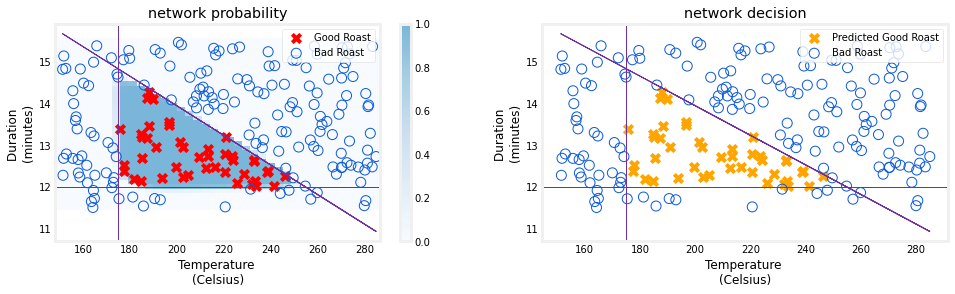

In [23]:
netf = lambda x: predict(norm_l(x), W1, b1, W2, b2)
plt_network(X, Y, netf)